In [152]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats


In [153]:
# Import data and preprocessing
df = pd.read_csv("files/Case_PRB.csv", header = 0)
df = df.fillna(0)

df_netherlands = df[(df['location'] == "France")]

X = pd.to_datetime(df_netherlands['date'])
y = df_netherlands[['total_cases']]

[]

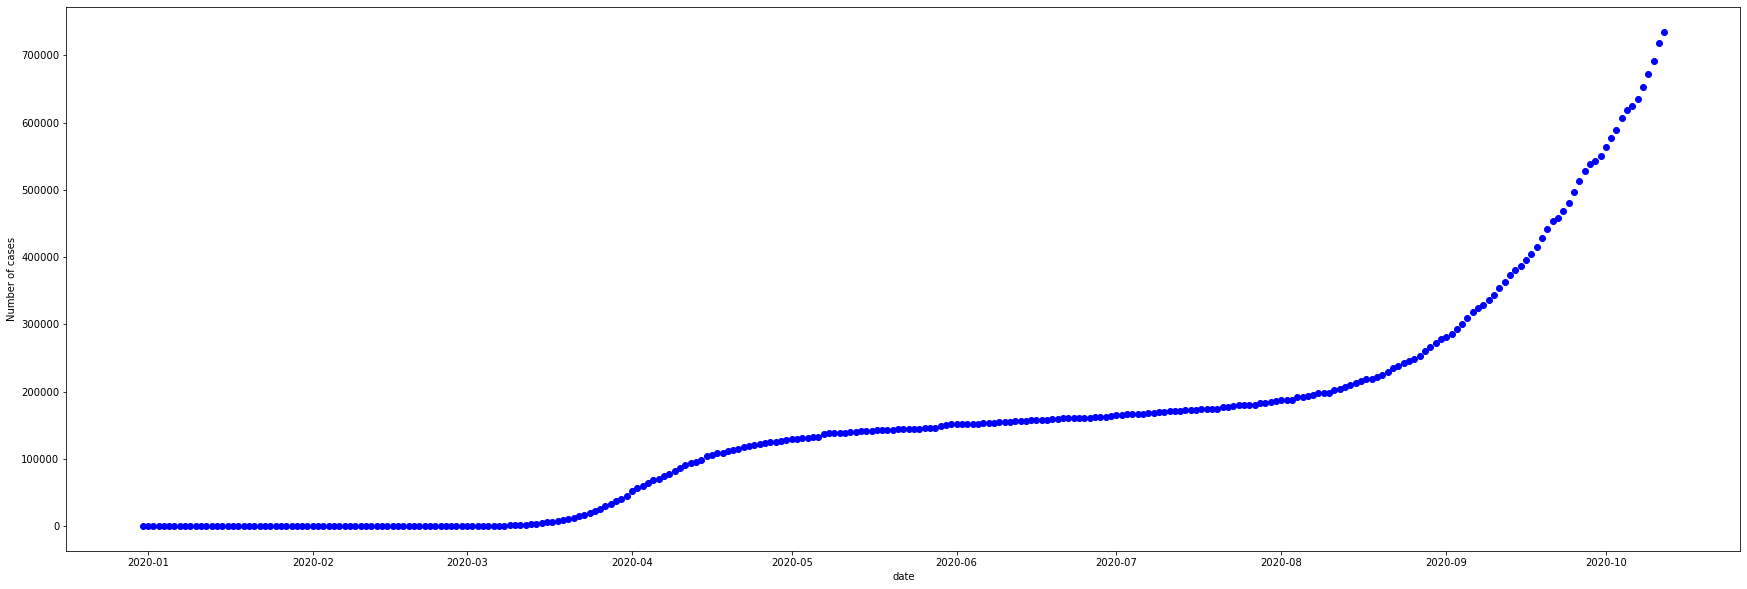

In [154]:
# Plotting the information
plt.rcParams["figure.figsize"] = (30, 10)
plt.scatter(X, y, color="blue")
plt.xlabel('date')
plt.ylabel('Number of cases')
plt.plot()

0.7636131700466009


[]

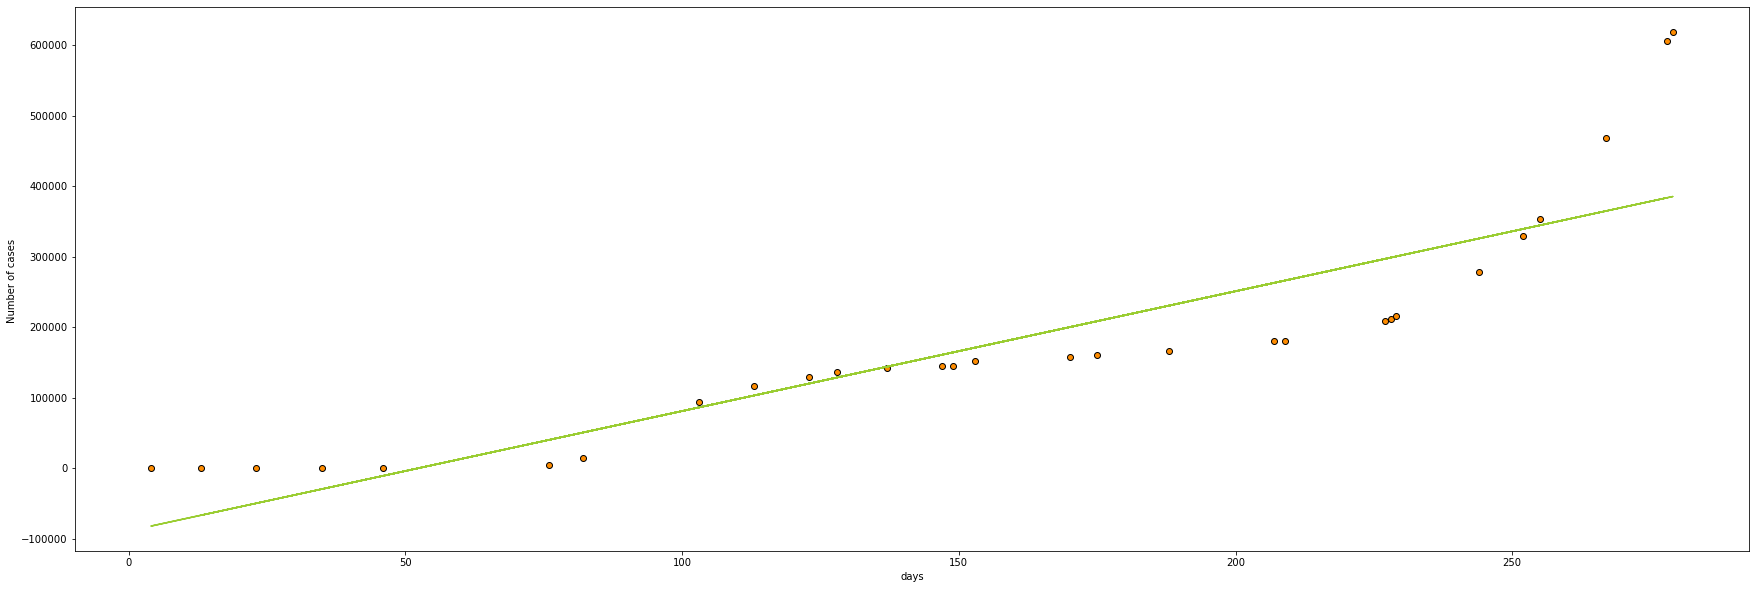

In [159]:

df_netherlands['time'] = np.arange(len(df_netherlands.index))
X = df_netherlands[['time']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1)

lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)

# this is the multiple R-squared of the prediction. This is measured how well the prediction line was predicted
# The score is quite impressive given the input data and the complex nature bahaviour of the virus. However, I think we can do better with other models  
print(accuracy_score)
# plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.plot(X_test, predictions, color="yellowgreen")
plt.xlabel('days')
plt.ylabel('Number of cases ')
plt.plot()

0.7708566676529431


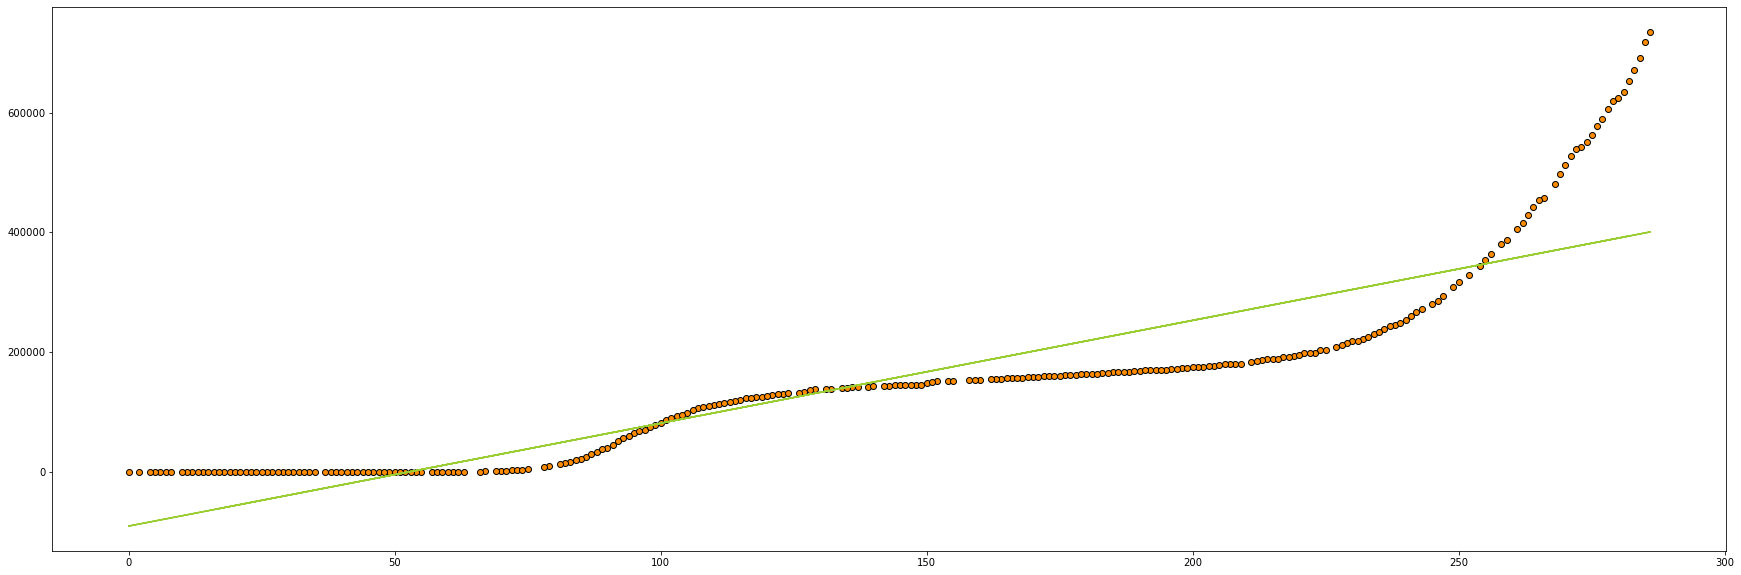

In [156]:

y_predictions = lr.predict(X_train)
accuracy_score2 = lr.score(X_train, y_train)
print(accuracy_score2)
plt.scatter(X_train, y_train, edgecolor="black", c="darkorange", label="new cases")
plt.plot(X_train, y_predictions, color="yellowgreen")



### If have time want to show tabel below more pretty

In [157]:

df = pd.DataFrame({'Actual': [y_test], 'Predicted': [predictions]})
df

,Actual,Predicted
0,total_cases 15791 152444.0 15767 ...,"[[179201.12366867106], [137957.86276940865], [..."


# We need to write out all of our finding: analysis, forecasting and conclusion 